# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Escaran, Jed Jerrel K.\
_Student No._: 2021-07451\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 18/04/24 11:59PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Jed Jerrel K. Escaran**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [17]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



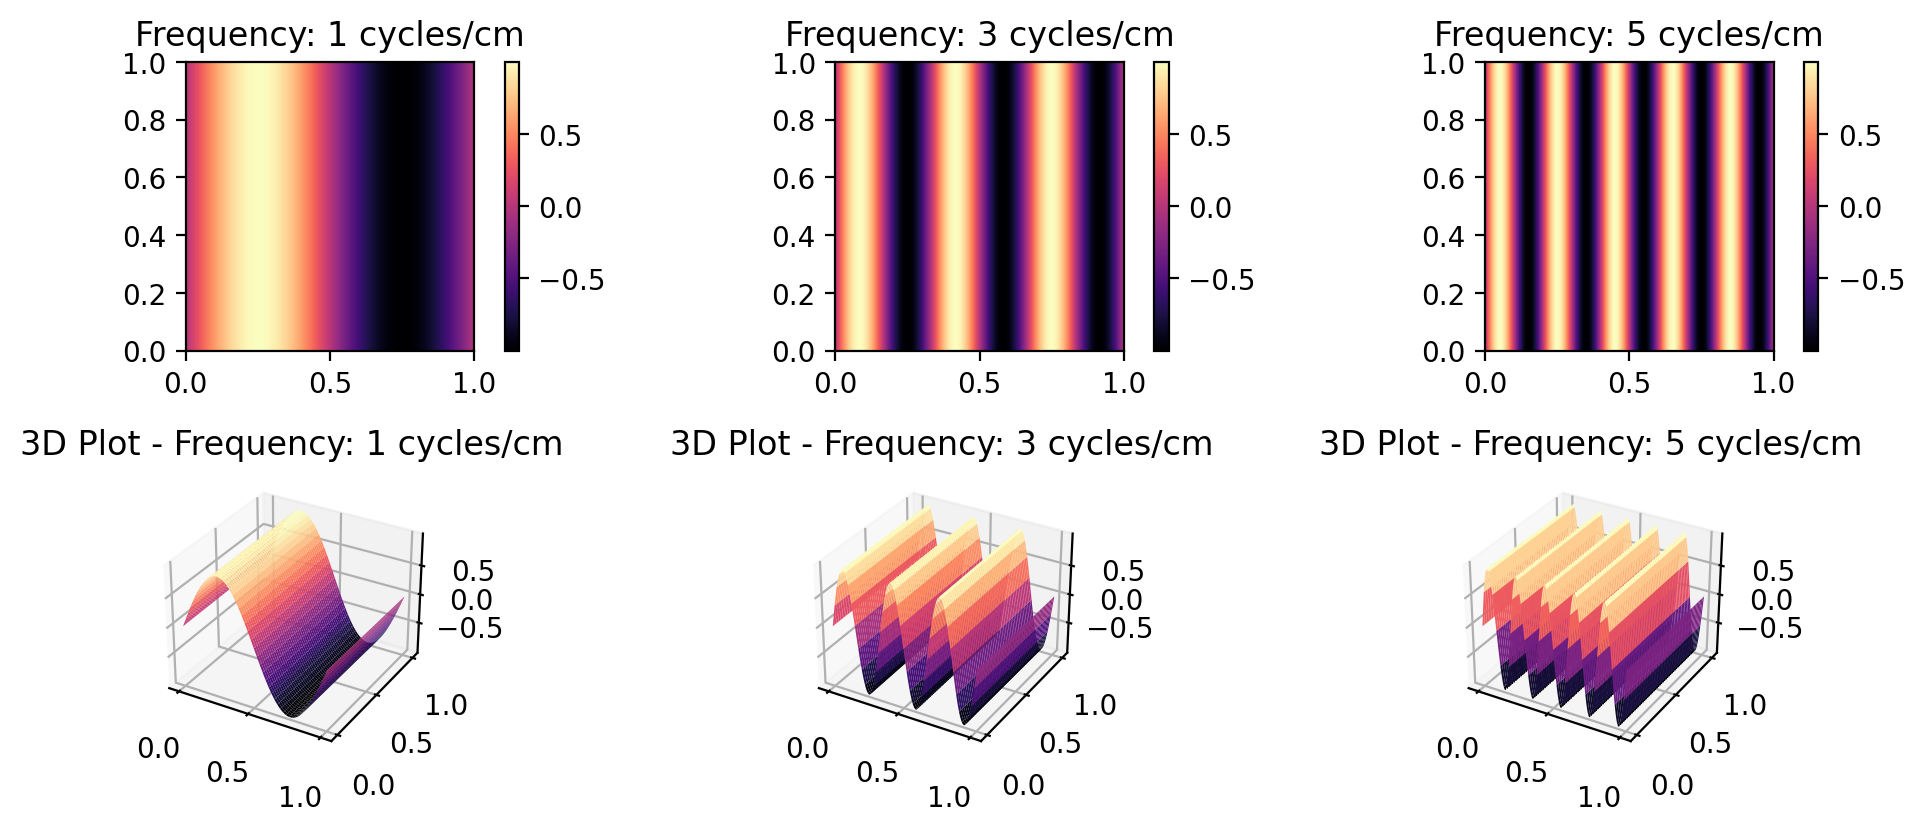

In [18]:
# define parameters
elementsizecm = 1  # size of the optical element in centimeters
imagesizepx = 400   # size of the image in pixels
freq = [1, 3, 5]    # frequencies of sinusoids in cycles/cm
elementsizepx = int(imagesizepx * elementsizecm)

fig = plt.figure(figsize=(10, 4), dpi=200)

# generate and plot images for each frequency
for i, j in enumerate(freq):
    # generate 2D sinusoid pattern
    x = np.linspace(0, 1, elementsizepx)
    sinusoid = np.sin(2 * np.pi * j * x)
    sinusoid_pattern = np.tile(sinusoid, (imagesizepx, 1))

    # plot heatmap of the sinusoid pattern
    plt.subplot(2, 3, i + 1)
    plt.imshow(sinusoid_pattern, cmap='magma', extent=[0, elementsizecm, 0, elementsizecm])
    plt.colorbar()
    plt.title(f'Frequency: {j} cycles/cm')

    #generate 3D sinusoid pattern
    xx = np.linspace(0, 1, imagesizepx)
    X, Y = np.meshgrid(xx, xx)
    sinusoid = np.sin(2 * np.pi * j * xx)
    sinusoid_pattern = np.tile(sinusoid, (imagesizepx, 1))

    # plot 3D view of the sinusoid pattern
    ax = plt.subplot(2, 3, i + 4, projection='3d')
    ax.plot_surface(X, Y, sinusoid_pattern, cmap='magma')
    ax.set_title(f'3D Plot - Frequency: {j} cycles/cm')

plt.tight_layout()
plt.show()

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

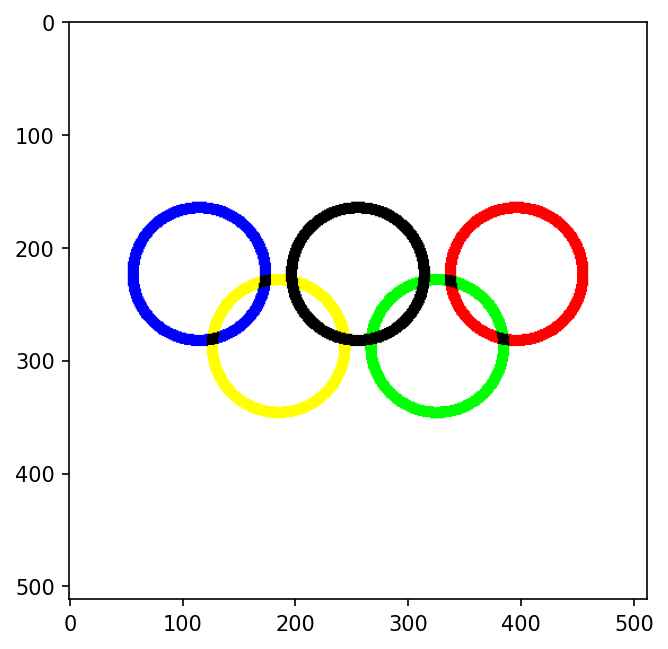

In [19]:
# define the size of the grid
N = 512
x = np.linspace(-10, 10, num=N)
y = x
X, Y = np.meshgrid(x, y)

# define outer and inner radii of the rings
outer_radius = 2.5
inner_radius = 2.1

#arrays for the red, green, and blue channels
Rd, Gn, Bl = np.ones((N, N)), np.ones((N, N)), np.ones((N, N))

# first ring
R = np.sqrt((X) ** 2 + (Y+1.25) ** 2)
Rd[np.where((R < outer_radius) & (R >= inner_radius))] = 0.0
Gn[np.where((R < outer_radius) & (R >= inner_radius))] = 0.0
Bl[np.where((R < outer_radius) & (R >= inner_radius))] = 0.0

#second ring
R = np.sqrt((X+5.5) ** 2 + (Y+1.25) ** 2)
Rd[np.where((R < outer_radius) & (R >= inner_radius))] = 0.0
Gn[np.where((R < outer_radius) & (R >= inner_radius))] = 0.0

#third ring
R = np.sqrt((X-5.5) ** 2 + (Y+1.25) ** 2)
Gn[np.where((R < outer_radius) & (R >= inner_radius))] = 0.0
Bl[np.where((R < outer_radius) & (R >= inner_radius))] = 0.0

#fourth ring
R = np.sqrt((X+2.75) ** 2 + (Y-1.25) ** 2)
Bl[np.where((R < outer_radius) & (R >= inner_radius))] = 0.0

# fifth ring
R = np.sqrt((X-2.75) ** 2 + (Y-1.25) ** 2)
Rd[np.where((R < outer_radius) & (R >= inner_radius))] = 0.0
Bl[np.where((R < outer_radius) & (R >= inner_radius))] = 0.0

#creating the RGB image by "stacking" the R, G, and B arrays
I_rgb = np.ones((N, N, 3))
I_rgb[..., 0] = Rd
I_rgb[..., 1] = Gn
I_rgb[..., 2] = Bl

#plot the RGB image
plt.figure(figsize=(5, 5), dpi=150)
plt.imshow(I_rgb)
plt.show()


#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

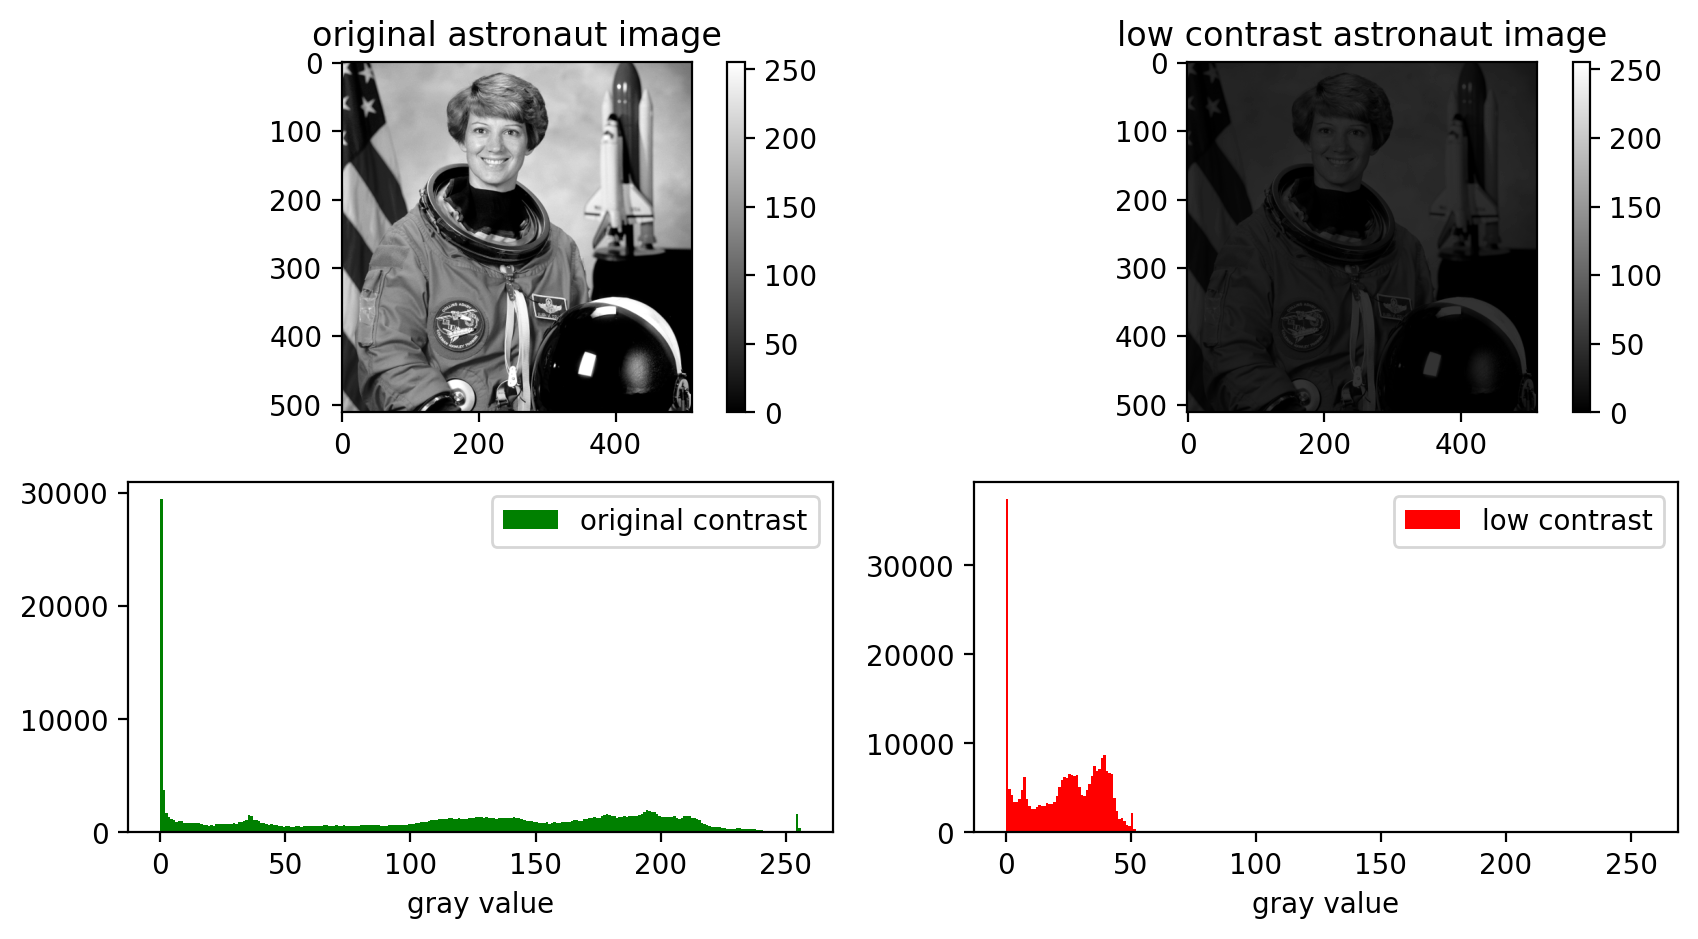

In [20]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(221)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.title("original astronaut image")
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(222)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.title("low contrast astronaut image")
plt.colorbar()

plt.subplot(223)
plt.hist(img.flatten(), 256, [0, 256], color='g', label='original contrast')
plt.xlabel("gray value")
plt.legend()
plt.subplot(224)
plt.hist(img_low_contrast.flatten(), 256, [0, 256], color='r', label='low contrast')
plt.xlabel("gray value")
plt.legend()

in the original grayscale image, the values peak at and near 0 and gets spread evenly. in the low contrast image, the values are more compactly situated, near 0. this is evident from the low contrasted image, where it looks significantly darker (more gray values near 0).

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

Text(0.5, 0, 'gray value')

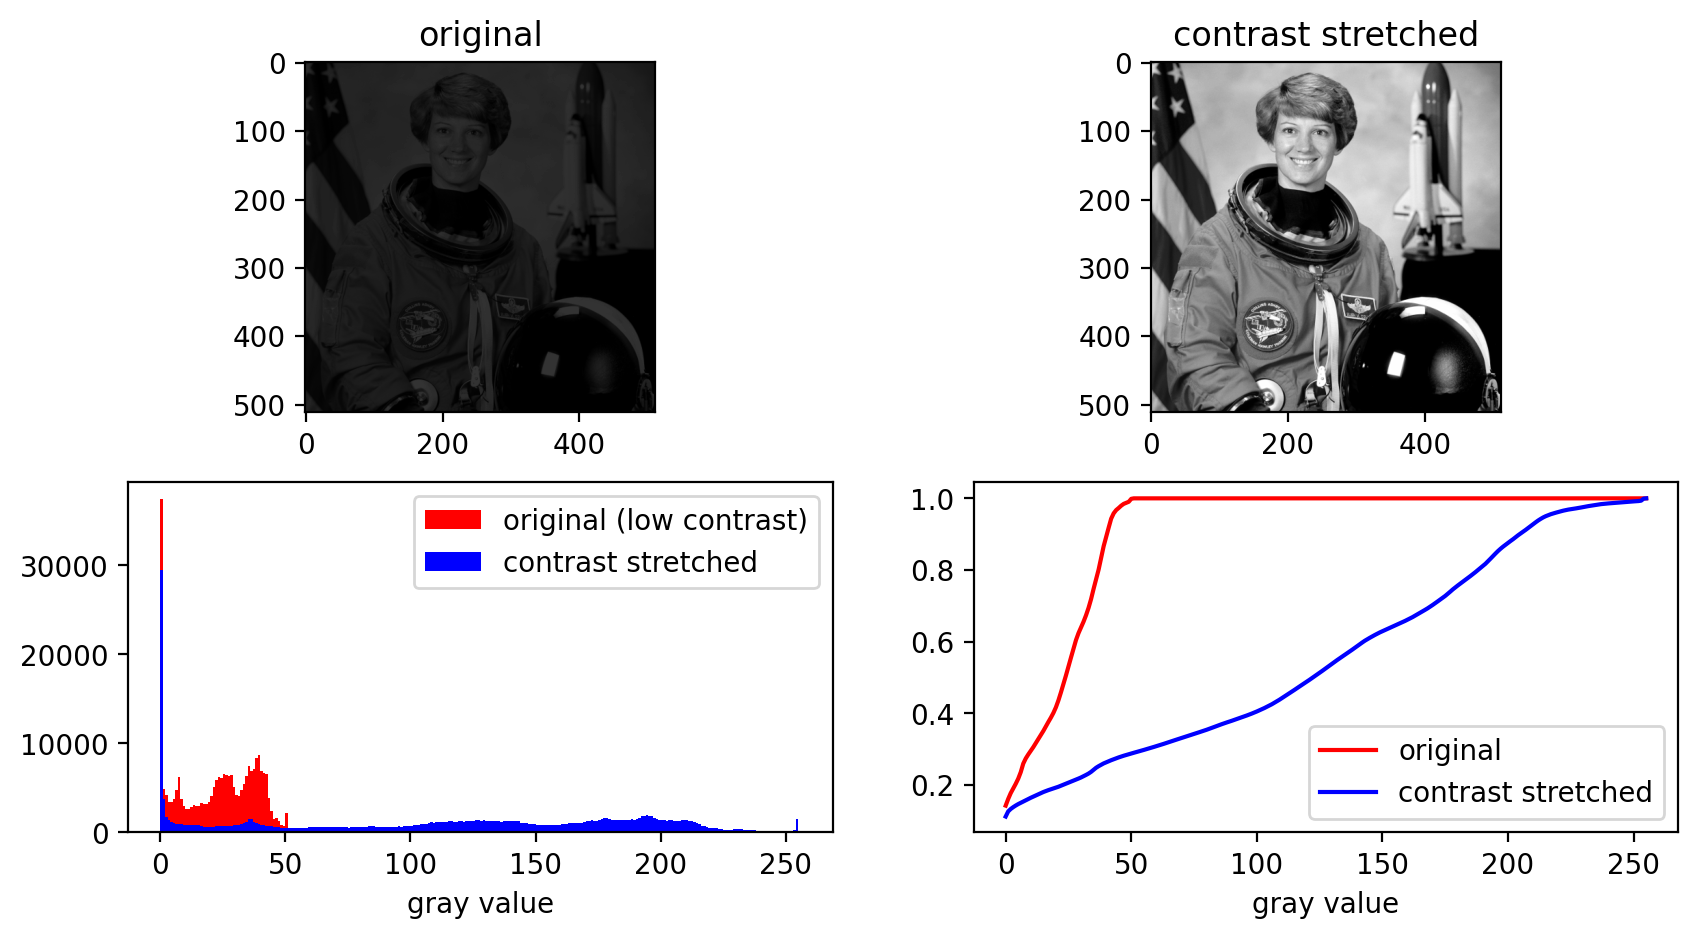

In [21]:
def contrast_stretch(image):
    return (image - image.min()) * (255 / (image.max() - image.min()))          # contrast stretch formula

img_stretched = contrast_stretch(img_low_contrast)

#plotting
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(2,2,1)
plt.imshow(img_low_contrast, cmap="gray", vmax=255)
plt.title("original")
plt.subplot(2,2,2)
plt.imshow(img_stretched, cmap="gray", vmax=255)
plt.title("contrast stretched")

#taking cdf of low contrast
hist, bins = np.histogram(img_low_contrast, 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

#plotting
plt.subplot(2,2,3)
plt.hist(img_low_contrast.flatten(), 256, [0, 256], color='r', label="original (low contrast)")
plt.hist(img_stretched.flatten(), 256, [0, 256], color='b', label='contrast stretched')

plt.legend()
plt.xlabel("gray value")

#taking cdf of contrast stretched
hist_, bins_ = np.histogram(img_stretched, 256, [0, 256])
cdf_ = hist_.cumsum()
cdf_normalized_ = cdf_ / cdf_.max()

#plotting
plt.subplot(2,2,4)
plt.plot(cdf_normalized, 'r', label="original")
plt.plot(cdf_normalized_, 'b',label="contrast stretched")
plt.legend()
plt.xlabel("gray value")


#contrast stretching is a method of enhancing the contrast of an image by expanding the range of intensity values it covers

##(image - image.min()) * (255 / (image.max() - image.min()))

 first, we calculate the minimum and maximum intensity values present in the input image. image.min() returns the minimum intensity value, and image.max() returns the maximum intensity value. these values represent the range of intensity values present in the original image.

 secondly, we subtract the minimum intensity value from every pixel in the image using (image - image.min()). this effectively shifts the intensity range so that the minimum intensity value becomes 0. this ensures that the darkest part of the image becomes pure black (0 intensity).

 third, we calculate a scaling factor (255 / (image.max() - image.min())). this factor is used to scale the intensity values linearly so that the maximum intensity value becomes 255, which represents pure white. this ensures that the brightest part of the image becomes pure white (255 intensity).

 lastly, we multiply each shifted intensity value by the scaling factor. this scales the intensity values linearly across the full range from 0 to 255. as a result, the contrast of the image is enhanced, as the intensity values are stretched to cover the entire dynamic range.

